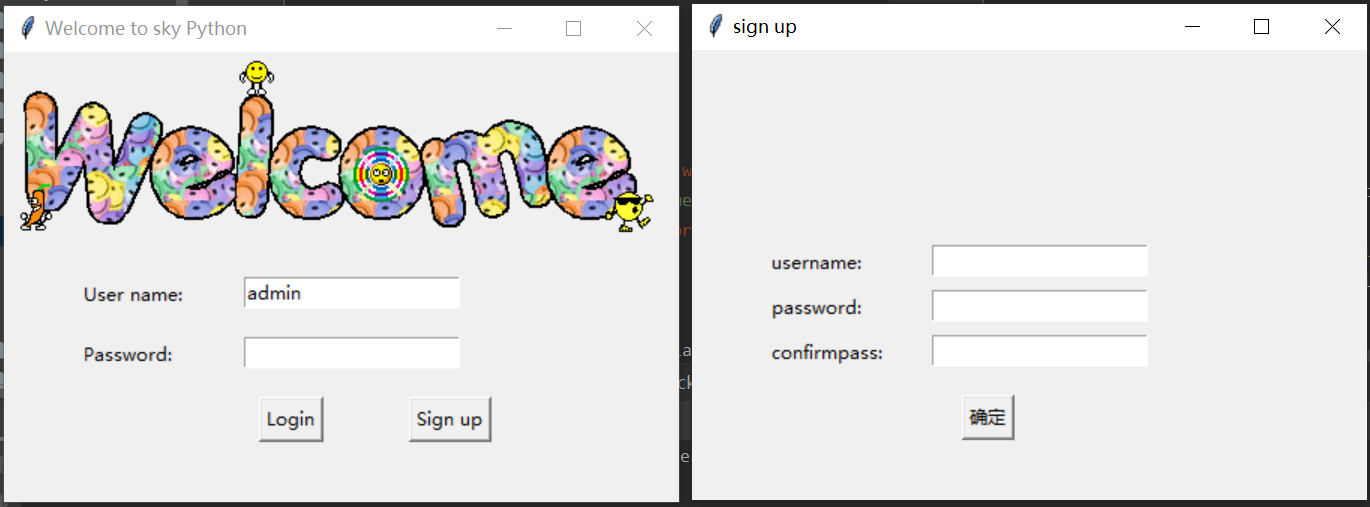

In [ ]:
import tkinter as tk
from tkinter import messagebox  # import this to fix messagebox error
import pickle

window = tk.Tk()
window.title('Welcome to sky Python')
window.geometry('450x300')

# welcome image
canvas = tk.Canvas(window, height=200, width=500)
image_file = tk.PhotoImage(file='welcome.gif')
image = canvas.create_image(0, 0, anchor='nw', image=image_file)
canvas.pack(side='top')

# user information
tk.Label(window, text='User name: ').place(x=50, y=150)
tk.Label(window, text='Password: ').place(x=50, y=190)

var_usr_name = tk.StringVar()
var_usr_name.set('admin')
entry_usr_name = tk.Entry(window, textvariable=var_usr_name)
entry_usr_name.place(x=160, y=150)
var_usr_pwd = tk.StringVar()
entry_usr_pwd = tk.Entry(window, textvariable=var_usr_pwd, show='*')
entry_usr_pwd.place(x=160, y=190)


def usr_login():
    usr_name = var_usr_name.get()
    usr_pwd = var_usr_pwd.get()
    try:
        with open('usrs_info.pickle', 'rb') as usr_file:
            usrs_info = pickle.load(usr_file)
            print(usrs_info)
    except FileNotFoundError:
        with open('usrs_info.pickle', 'wb') as usr_file:
            usrs_info = {'admin': 'admin'}
            pickle.dump(usrs_info, usr_file)
    if usr_name in usrs_info:
        if usr_pwd == usrs_info[usr_name]:
            tk.messagebox.showinfo(title='Welcome', message='How are you? ' + usr_name)
        else:
            tk.messagebox.showerror(message='Error, your password is wrong, try again.')
    # else:
    #     is_sign_up = tk.messagebox.askyesno('Welcome', 'You have not signed up yet. Sign up today?')
    #     # if is_sign_up:
    #     #     usr_sign_up()


def usr_sign_up():
    #确认注册函数，以便后面调用
    def signyes():
        username = sign_up_name.get()
        password = sign_up_pwd.get()
        confirmpass = sign_up_conf.get()
        try:
            with open('usrs_info.pickle','rb') as usr_file:
                exist_usr_info = pickle.load(usr_file)
        except FileNotFoundError:
            exist_usr_info = {}
        if username in exist_usr_info:
            tk.messagebox.showerror(message='用户已存在！')
        elif username == '' and password == '':
            tk.messagebox.showerror(message='用户名和密码不能为空！')
        elif password != confirmpass:
            tk.messagebox.showerror(message='密码前后不一致！')
        else:
            exist_usr_info[username] = password
            with open('usrs_info.pickle', 'wb') as usr_file:
                pickle.dump(exist_usr_info, usr_file)
                tk.messagebox.showinfo(message='注册成功！')
                window_sign.destroy()  #存完了就销毁页面

    #新建注册窗口
    window_sign = tk.Toplevel(window)
    window_sign.geometry('450x300')
    window_sign.title('sign up')
    #注册组件的文字部分
    tk.Label(window_sign, text='username: ').place(x=50, y=130)
    tk.Label(window_sign, text='password: ').place(x=50, y=160)
    tk.Label(window_sign, text='confirmpass: ').place(x=50, y=190)
    # 注册组件框部分
    sign_up_name = tk.StringVar()
    sign_up_pwd = tk.StringVar()
    sign_up_conf = tk.StringVar()
    enter_sign_up_name = tk.Entry(window_sign, textvariable=sign_up_name)
    enter_sign_up_name.place(x=160, y=130)
    enter_sign_up_pwd = tk.Entry(window_sign, textvariable=sign_up_pwd, show='*')
    enter_sign_up_pwd.place(x=160, y=160)
    enter_sign_up_conf = tk.Entry(window_sign, textvariable=sign_up_conf, show='*')
    enter_sign_up_conf.place(x=160, y=190)
    #确认注册按钮
    btn_confirm = tk.Button(window_sign, text='确定', command=signyes)
    btn_confirm.place(x=180, y=230)

# login and sign up button
btn_login = tk.Button(window, text='Login', command=usr_login) #这里command是方法
btn_login.place(x=170, y=230)
btn_sign_up = tk.Button(window, text='Sign up', command=usr_sign_up)
btn_sign_up.place(x=270, y=230)

window.mainloop()

